# ICT 778-005 Day 9: Object Oriented Programming

In this lecture we will:
- expand on classes; and 
- cover some of the concepts in the Pandas Library

# Person Class
## Basic definition

Assume we want to create a class to keep track of people's info. For each person added we want to keep track of name, address, age, salary, sex, and occupation.

To do so first we need to create a class called `person` then after that we start adding the attributed for this class

In [38]:
class Person:
    # SL Rewrite for style guide and readability.
    def __init__(self,_id,name,address,age,salary,sex,occupation):
        self.id=_id  # Python guidelines are to use a leading _ if your variable name would clash with a built-in keyword (id). Or use a reasonable synonym.
        self.name=name
        self.address=address
        self.age=age
        self.salary=salary
        self.sex=sex
        self.occupation=occupation
        
    def __str__(self):
        return f"{self.id} - {self.name}"

Now let's read data from a file and create a list of people

In [39]:
def load_data():
    import csv
    people=[]
    with open('day9/people.csv', 'r') as file:
        reader = csv.reader(file, delimiter='\t') 
        next(reader, None) # remove header by skipping one row. Next() is a function that gets the next value from an iterable.
        # Behind the scenes, for row in reader calls next() every time it starts an iteration.
        for row in reader:
            #people.append(person(int(row[0]),row[1],row[2],int(row[3]),float(row[4]),row[5],row[6]))  # SL Unreadable
            people.append(Person(
                _id=int(row[0]),
                name=row[1],
                address=row[2],
                age=int(row[3]),
                salary=float(row[4]),
                sex=row[5],
                occupation=row[6]
            ))
    return people

people = load_data()
for person in people:
    print(person)
        


1 - Mike
2 - Kristine
3 - Chris
4 - sam


## Equality of two objects

Now, let's add a new person to the list only and only if this person was not already added. To check if a person is already added we just want to make sure the Id is not the same. 

In [40]:
pp=Person(1,"Mike","Calgary-Canada",18,4000,"m","Occuntant") 

if pp not in people:
    people.append(pp)

for pp in people:
    print(pp)

1 - Mike
2 - Kristine
3 - Chris
4 - sam
1 - Mike


We note that Mike was added again, even though he was already in the database with all the same details. That happens because we haven't defined what it means for 2 objects of the class Person to be equal to one another. To do so we need to define what the `==` operator should do for a Person. To do so we need to override the `__eq__()` method in the class. We say _override_ as every object has a default `__eq__()` method. But the default requires that the reference in memory is identical. 

Put another way, when you perform an `==` comparison on two objects, python calls the `__eq__()` method on the first one and gives it the second object. If the return value is `True` the objects are defined to be the same.

In [41]:
class Person:
    def __init__(self,_id,name,address,age,salary,sex,occupation):
        self.id=_id  # Python guidelines are to use a leading _ if your variable name would clash with a built-in keyword (id). Or use a reasonable synonym.
        self.name=name
        self.address=address
        self.age=age
        self.salary=salary
        self.sex=sex
        self.occupation=occupation
        
    def __str__(self):
        return f"{self.id} - {self.name}"
    
    def __eq__(self,other):
        return self.id==other.id

In the example above Mike has been added although there was another person with the same id. Let's reload our data using the new class definition and test if our new equality operator works as intended.


In [42]:
people = load_data()
pp=Person(1,"Mike","Calgary-Canada",18,4000,"m","Occuntant") 


if pp not in people:
    people.append(pp)

for pp in people:
    print(pp)

1 - Mike
2 - Kristine
3 - Chris
4 - sam


In the example above Mike was not added as there is another person with the same id.

## Improving the address with another class

Now the address attribute is a composite attribute. Which means its value can be split into city and country. How I can do that? 
We can create another class called address with two attributes namely `city` and `country`

In [23]:
class Address:
    def __init__(self,city,country):
        self.city=city
        self.country=country
    def __str__(self):
        return self.city+"-"+self.country

Let's rewrite our load_data to use this Address class to store the Person's address

In [26]:
def load_data(filename="day9/people.csv"):
    import csv
    people=[]
    with open(filename, 'r') as file:
        reader = csv.reader(file, delimiter='\t')
        next(reader, None) # remove header by skipping one row.
        for row in reader:
            address_components = row[2].split('-')  # string is formatted as 'city-country'
            address = Address(address_components[0], address_components[1])
            # Equivalent using the * operator. 
            address = Address(*address_components)  # Remember, * converts a list to individual values
            people.append(Person(
                _id=int(row[0]),
                name=row[1],
                address=address,
                age=int(row[3]),
                salary=float(row[4]),
                sex=row[5],
                occupation=row[6]
            ))
    return people

In [27]:
people = load_data()
for p in people:
    print(p.address.city)

Calgary
Edmonton
Vancouver
Toronto


## Interactions between classes (Remember the paddock? ;-))
Can we have a class called people where we can manipulate people's info such as a new person, remove a person, check if we have people, etc? 

In [29]:
class PeopleRegistry:
    import random
    
    def __init__(self):
        self.people=[]
        
    def remove_person(self,person):
        if person in self.people:
            self.people.remove(person)  # This also relies on our __eq__() definition!
            
    def add_person(self,person):
        if person not in self.people:
            self.people.append(person)
            
    def is_empty(self):
        return len(self.people)==0
        
    def shuffle_people(self):
        return random.shuffle(self.people)

## Inheritance


Inheritance is a way of creating a new class for using details of an existing class. The new class is a derived class from the parent class.

Now let's assume some of the people are lovely people and we want to keep track of that. Then we can create a class called `LovelyPerson` that inherits all the functions from `Person` and also has its own function. (**SL**: He used the PeopleRegistry for this which was non-sensical. Changed to a more sensible example. Although BuckSkinHorse and even SawyerHorse might have been more logical ;-))

In [37]:
class Person:
    def __init__(self,_id,name,address,age,salary,sex,occupation):
        self.id=_id  # Python guidelines are to use a leading _ if your variable name would clash with a built-in keyword (id). Or use a reasonable synonym.
        self.name=name
        self.address=address
        self.age=age
        self.salary=salary
        self.sex=sex
        self.occupation=occupation
        
    def __str__(self):
        return f"{self.id} - {self.name}"
    
    def __eq__(self,other):
        return self.id==other.id

class LovelyPerson(Person):
    # def __init__(self):  # SL No longer required since Python 3.0 unless you want to do fancy stuff
    #     super().__init__()
    
    def who_is_this(self):
        return "I am a lovely person"

In [38]:
lovely = LovelyPerson(1,"Sebastiaan","Calgary-Canada","30+","20000+","M","Python Tutor")
print(lovely.who_is_this())
print(lovely.name)

I am a lovely person
Sebastiaan


In general Object-Oriented Programming makes the program easy to understand as well as efficient. Code can be share and re-used along with data being safe and secure with data abstraction (Better examples of this to follow I presume)

 # Brief Intro To Panda

Pandas is one of the major Python packages for data analysis. In this lecture, we will cover the foundations of this library

You should first make sure to import the library. By convention we often use `import pandas as pd` to save on the number of pandas in our code. They are almost extinct after all ;)

Often data loaded into panda is in a CSV file (comma separated). In this lecture, we will use `books.csv` uploaded on D2L. We'll import the Pandas package and then read the data into Jupyter.

In [44]:
import pandas as pd

bookdata = pd.read_csv('day9/books.csv')

Now the `book.csv` is imported as a `Dataframe` object. This allows us to use functions provided by the dataframe object  
Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html  
The number of available methods of a Dataframe is way too large to cover all in a lecture or even in the entire series. It's highly recommended to read through the available functions to get a flavor of the available functionality before you start your project.

We can view the `bookdata` object by simply typing `bookdata` variable in a Jupyter cell.

In [45]:
bookdata

,Title,Author,Genre,Pages,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley
1,Data Smart,"Foreman, John",data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins
4,Orientalism,"Said, Edward",history,197,Penguin
...,...,...,...,...,...
206,Structure and Randomness,"Tao, Terence",mathematics,252,NaN
207,Image Processing with MATLAB,"Eddins, Steve",signal_processing,241,NaN
208,Animal Farm,"Orwell, George",fiction,180,NaN
209,"Idiot, The","Dostoevsky, Fyodor",fiction,197,NaN


To print the first top 5 rows we can use the `head()` function

In [46]:
bookdata.head()
# bookdata.head(20)  # This would print the top 20 rows instead. 5 is just the default.

,Title,Author,Genre,Pages,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley
1,Data Smart,"Foreman, John",data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins
4,Orientalism,"Said, Edward",history,197,Penguin


To print column names we can use `columns` attribute

In [47]:
bookdata.columns

Index(['Title', 'Author', 'Genre', 'Pages', 'Publisher'], dtype='object')

To only display certain rows, use slicing. We'll display rows 8 through 16.

In [48]:
bookdata[8:16]  # Slice operates on the rows

,Title,Author,Genre,Pages,Publisher
8,Image Processing & Mathematical Morphology,"Shih, Frank",signal_processing,241,CRC
9,How to Think Like Sherlock Holmes,"Konnikova, Maria",psychology,240,Penguin
10,Data Scientists at Work,Sebastian Gutierrez,data_science,230,Apress
11,Slaughterhouse Five,"Vonnegut, Kurt",fiction,198,Random House
12,Birth of a Theorem,"Villani, Cedric",mathematics,234,Bodley Head
13,Structure & Interpretation of Computer Programs,"Sussman, Gerald",computer_science,240,MIT Press
14,"Age of Wrath, The","Eraly, Abraham",history,238,Penguin
15,"Trial, The","Kafka, Frank",fiction,198,Random House


We can also display specific columns of the dataframe by using a similar technique to accessing dictionary values by key. Instead of specifying a key, we now specify the column name.

In [49]:
# Display all of the book authors.
file_authors = bookdata['Author']  # Note that here pandas understands that you want a column instead of a row! It is considerably smarter than a dictionary.
file_authors

0        Goswami, Jaideva
1           Foreman, John
2        Hawking, Stephen
3         Dubner, Stephen
4            Said, Edward
              ...        
206          Tao, Terence
207         Eddins, Steve
208        Orwell, George
209    Dostoevsky, Fyodor
210      Dickens, Charles
Name: Author, Length: 211, dtype: object

In [58]:
# Display all of the book authors AND publishers.
file_authors_and_publishers = bookdata[['Author','Publisher']]  # Really same syntax as above, but we want to pass it more than one column header so that becomes a list. 
file_authors_and_publishers

,Author,Publisher
0,"Goswami, Jaideva",Wiley
1,"Foreman, John",Wiley
2,"Hawking, Stephen",Penguin
3,"Dubner, Stephen",HarperCollins
4,"Said, Edward",Penguin
...,...,...
206,"Tao, Terence",NaN
207,"Eddins, Steve",NaN
208,"Orwell, George",NaN
209,"Dostoevsky, Fyodor",NaN


We can select which rows and columns to be printed using `iloc`.  This is a selector of rows _AND_ columns using integers.  
Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [51]:
bookdata.iloc[8:16,[2,3]]

,Genre,Pages
8,signal_processing,241
9,psychology,240
10,data_science,230
11,fiction,198
12,mathematics,234
13,computer_science,240
14,history,238
15,fiction,198


SL: There is an equivalent attribute called `loc` that lets you access the data using column names. It also allows you to select in both rows and columns.

In [52]:
bookdata.loc[8:16,['Genre', 'Pages']]

,Genre,Pages
8,signal_processing,241
9,psychology,240
10,data_science,230
11,fiction,198
12,mathematics,234
13,computer_science,240
14,history,238
15,fiction,198
16,data_science,236


From looking at the displayed data 2 examples ago, we can see several missing entries, which are represented by 'not a number' or `NaN`. If we want to remove these entries, we may define a new dataset and call the `dropna` method of our `bookdata` object.

The argument of the `dropna` method is specified as `axis = 0`, which means drop any *row* with missing values. If you specify `axis = 1`, you will drop any *column* with missing values.

In [53]:
file_nomissing = bookdata.dropna(axis = 0)
file_nomissing

,Title,Author,Genre,Pages,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley
1,Data Smart,"Foreman, John",data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins
4,Orientalism,"Said, Edward",history,197,Penguin
...,...,...,...,...,...
114,Rationality & Freedom,"Sen, Amartya",economics,213,Springer
115,Clash of Civilizations and Remaking of the Wor...,"Huntington, Samuel",history,228,Simon&Schuster
116,Uncommon Wisdom,"Capra, Fritjof",nonfiction,197,Fontana
117,One,"Bach, Richard",nonfiction,172,Dell


In [54]:
print("As you can tell from the following output, we dropped a lot of rows doing this!")
print(len(bookdata), len(file_nomissing))

As you can tell from the following output, we dropped a lot of rows doing this!
211 112


Now we'll make a quick histogram of the remaining data by number of pages. In this case, our histogram will plot how many books have total pages within given ranges.

array([[<AxesSubplot:title={'center':'Pages'}>]], dtype=object)

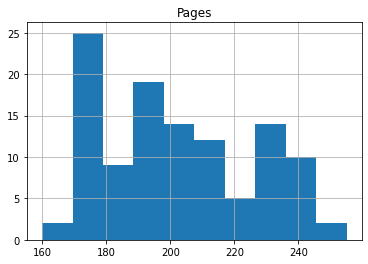

In [55]:
file_nomissing.hist()

SL: But wait, how did pandas know to plot this column only? That's because it is the only column with a numeric value. The next example shows what happens when you have more than one numerical column.

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>]], dtype=object)

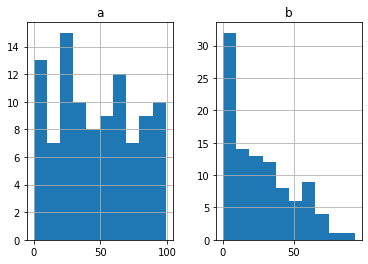

In [69]:
import random
data = {'a': [random.randrange(0, 100) for _ in range(100)], 'b': [random.randrange(0, i) for i in range(1, 101)]}
df = pd.DataFrame.from_dict(data)
df.hist()

There is also a useful function to get a quick overview of all those numeric data columns and their values: `describe()`

In [56]:
bookdata.describe()

,Pages
count,211.000000
mean,206.056872
std,26.828141
min,160.000000
25%,180.000000
50%,199.000000
75%,229.500000
max,283.000000
